<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone: Data Science Salary 2024 | Minh Hai Tran</h1></div>
<div style="position:relative; float:right">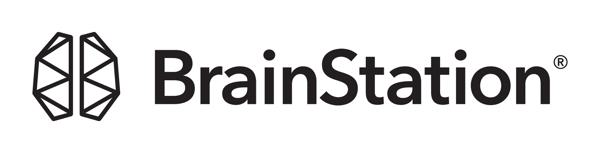
</div>
</div>

# Introduction

In the dynamic field of data science, understanding salary trends is crucial for professionals and organizations. This dataset provides insights into Data Science Salaries from 2020 to 2024, offering valuable information on trends, regional variations, and factors influencing compensation for data enthusiasts, researchers, and industry professionals.

# Impact
This project is anticipated to bring tangible benefits to both society and businesses. By leveraging advanced technology, the aim is to assist companies in setting salaries more effectively, thereby increasing employee satisfaction and reducing turnover rates. This could potentially save businesses expenses associated with hiring and training new staff. Additionally, by streamlining the salary negotiation process, both employees and companies can save valuable time. Moreover, offering fair and competitive pay can help companies attract top talent, giving them a competitive edge in the market. In essence, the project aims to enhance the salary determination process for all stakeholders involvd

# About data
The primary dataset was sourced from ai-jobs.net, consisting of 14,299 rows and 11 columns.

#### Data Dictionary
- **work_year**: The year the salary was paid.
- **experience_level**: The experience level in the job during the year with the following possible values:
  - EN: Entry-level / Junior
  - MI: Mid-level / Intermediate
  - SE: Senior-level / Expert
  - EX: Executive-level / Director
- **employment_type**: The type of employment for the role:
  - PT: Part-time
  - FT: Full-time
  - CT: Contract
  - FL: Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.
- **employee_residence**: Employee's primary country of residence during the work year as an ISO 3166 country code.
- **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
  - 0: No remote work (less than 20%)
  - 50: Partially remote/hybrid
  - 100: Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year:
  - S: less than 50 employees (small)
  - M: 50 to 250 employees (medium)
  - L: more than 250 employees (large)
 (large) |



___


**Question:** what is the insight and trend of data science salary ?

Breakdown steps:
1. The insight of salary in relation to experience level, employee type, job title, employee residence, remote ratio, company location and company size.
2. Analyze 3 types of modelling (Linear Regression, Random Forest Regressor and XGBoost Regressor) for modeling the relationship between salary and the other featur with accuracy and evaluation.
    

---

### Part 1: Explore Data

In [1]:
# install require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Loading dataset
df = pd.read_csv(r'C:\Users\mismi\Downloads\salaries.csv')
df.sample()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11765,2023,SE,FT,Machine Learning Infrastructure Engineer,100000,EUR,107968,FR,100,FR,M


In [3]:
df.shape #checking the shape

(14298, 11)

In [4]:
df.columns #check the number of Columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
df.info()# Check the data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14298 entries, 0 to 14297
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14298 non-null  int64 
 1   experience_level    14298 non-null  object
 2   employment_type     14298 non-null  object
 3   job_title           14298 non-null  object
 4   salary              14298 non-null  int64 
 5   salary_currency     14298 non-null  object
 6   salary_in_usd       14298 non-null  int64 
 7   employee_residence  14298 non-null  object
 8   remote_ratio        14298 non-null  int64 
 9   company_location    14298 non-null  object
 10  company_size        14298 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,"14,298.00","14,298.00","14,298.00","14,298.00"
mean,"2,023.11","165,747.06","149,992.25",33.11
std,0.69,"362,605.31","68,886.73",46.60
min,"2,020.00","14,000.00","15,000.00",0.00
25%,"2,023.00","103,050.00","102,500.00",0.00
50%,"2,023.00","142,200.00","141,525.00",0.00
75%,"2,024.00","187,942.50","185,900.00",100.00
max,"2,024.00","30,400,000.00","800,000.00",100.00


In [7]:
# Check for missing values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# check duplicate column
df.T.duplicated().sum()


0

In [9]:
# check duplicates row
df.duplicated().sum()

5497

In [10]:
# Drop duplicated rows
df = df.drop_duplicates()

# reset the index after dropping duplicates
df = df.reset_index(drop=True)

## Part 2: Exploratory Data Analysis (EDA)

- 2.1: How many job title in the dataser and the top 20?

In [11]:
color_1 = ('0000FF', 'FF7600', '007840', 'FF0000')

In [12]:
#How many job title?
df["job_title"].nunique()

150

In [13]:
# List of top 20 popular job in data tech
top_20_job_title = df["job_title"].value_counts()[:20]
top_20_job_title

job_title
Data Engineer                     1662
Data Scientist                    1635
Data Analyst                      1213
Machine Learning Engineer          844
Analytics Engineer                 329
Research Scientist                 278
Data Architect                     230
Research Engineer                  186
Data Science                       151
ML Engineer                        140
Business Intelligence Analyst      118
Applied Scientist                  116
Business Intelligence Engineer      97
Data Science Manager                96
Machine Learning Scientist          95
Research Analyst                    94
Data Manager                        88
AI Engineer                         82
Data Specialist                     62
BI Developer                        55
Name: count, dtype: int64

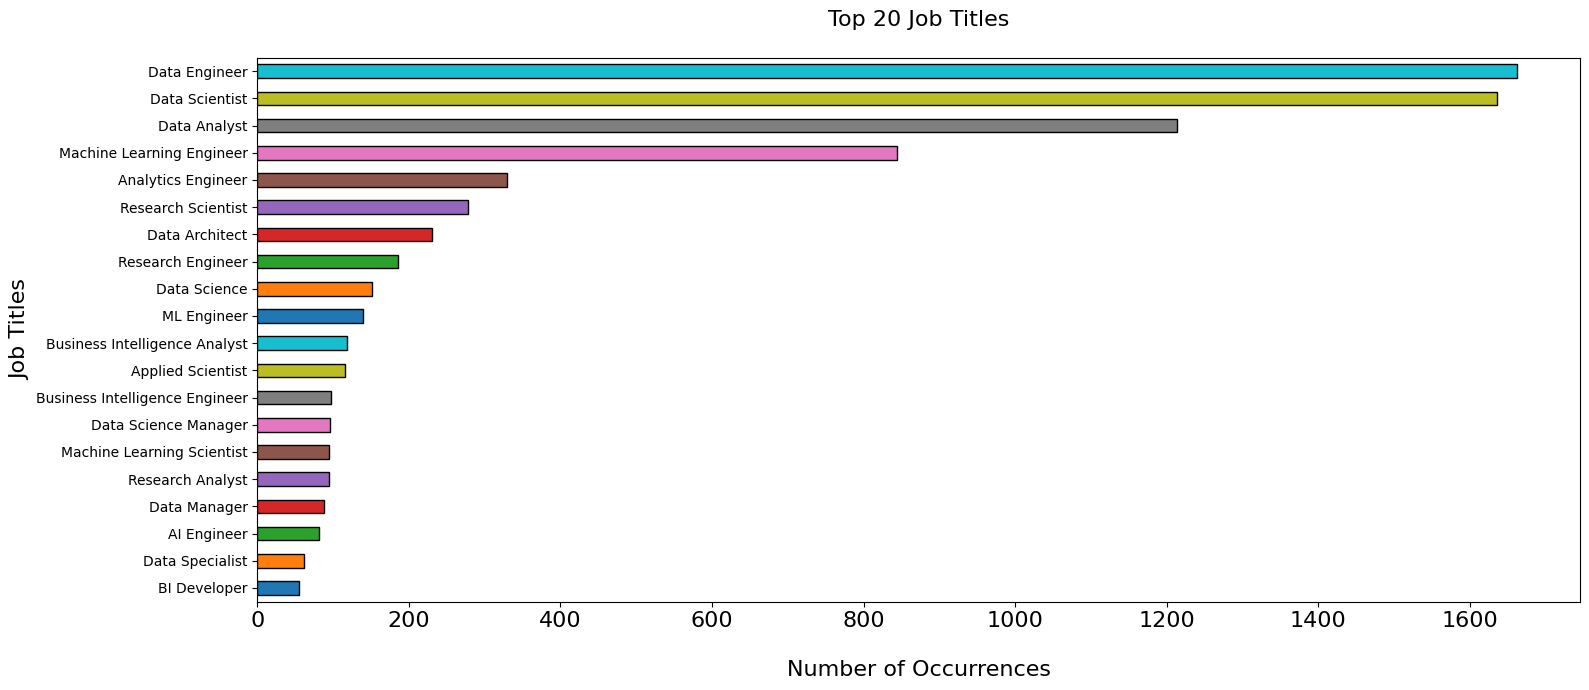

In [14]:
plt.figure(figsize=(16, 7))
top_20_job_title.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette(), edgecolor='black')
plt.ylabel('Job Titles', fontsize=16)
plt.xlabel('\nNumber of Occurrences', fontsize=16)
plt.title('Top 20 Job Titles\n', fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.tight_layout()
plt.show()

- 2.2: How many type of employment?

In [15]:
df["employment_type"].value_counts()

employment_type
FT    8739
CT      26
PT      23
FL      13
Name: count, dtype: int64

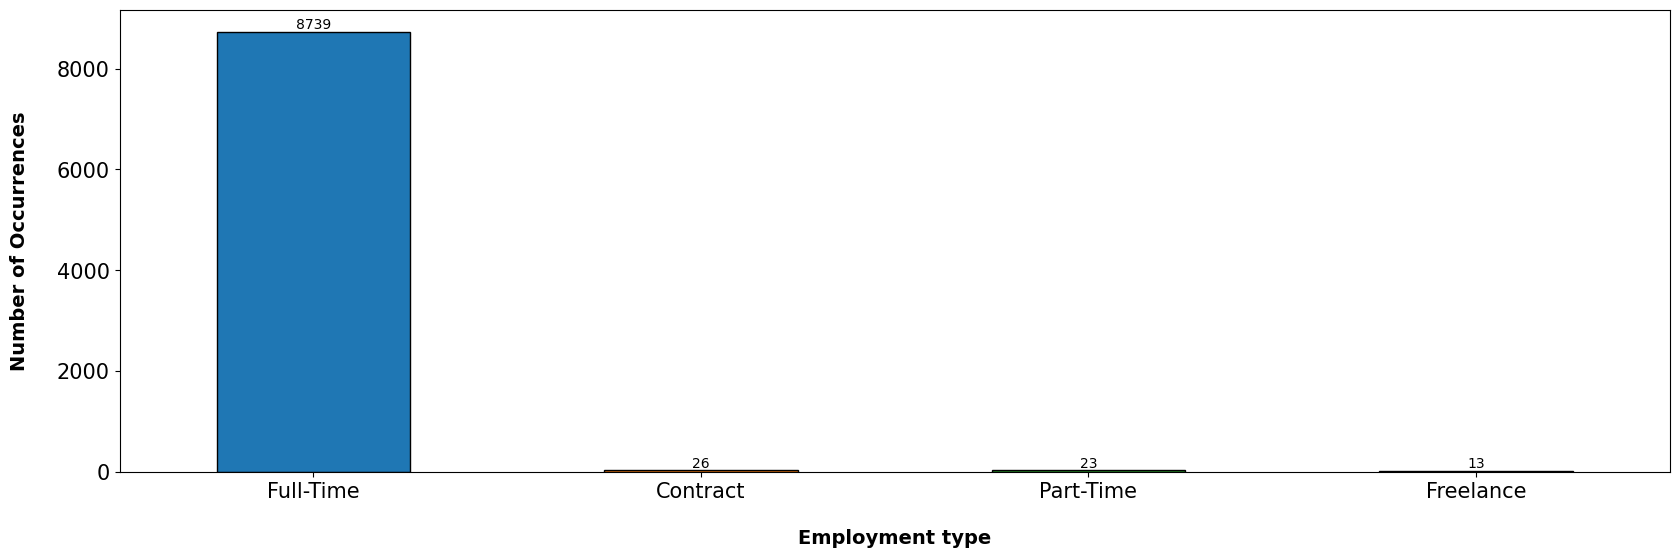

In [16]:
plt.figure(figsize = (20, 6))
ax = df["employment_type"].value_counts().plot(kind = 'bar', color = sns.color_palette(), edgecolor='black', rot = 0)
ax.set_xticklabels(('Full-Time', 'Contract', 'Part-Time', 'Freelance'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment type', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20);

- 2.3: how distribution of experience levels?

In [17]:
df["experience_level"].value_counts()

experience_level
SE    5260
MI    2358
EN     846
EX     337
Name: count, dtype: int64

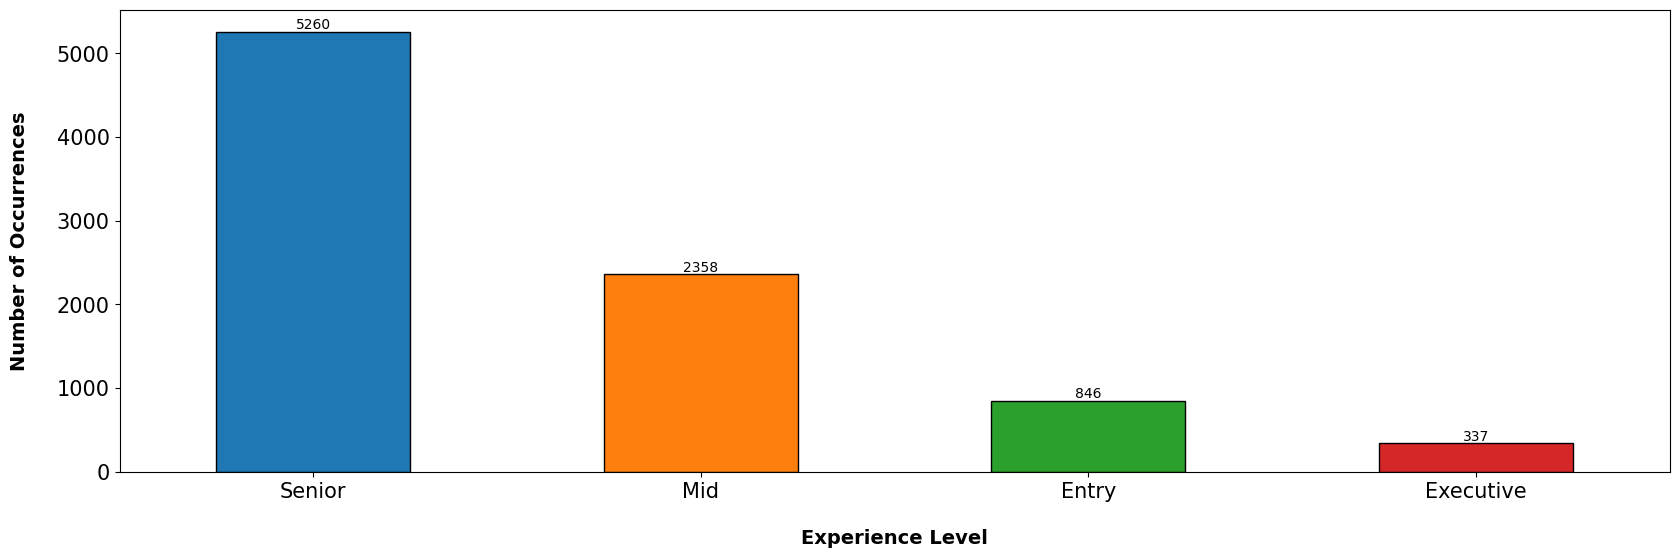

In [18]:
plt.figure(figsize = (20, 6))
ax = df["experience_level"].value_counts().plot(kind = 'bar', color = sns.color_palette(), edgecolor='black', rot = 0)
ax.set_xticklabels(('Senior', 'Mid', 'Entry', 'Executive'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Experience Level', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20);

- 2.4: what is the most popular of company size?

In [19]:
df["company_size"].value_counts()

company_size
M    8009
L     614
S     178
Name: count, dtype: int64

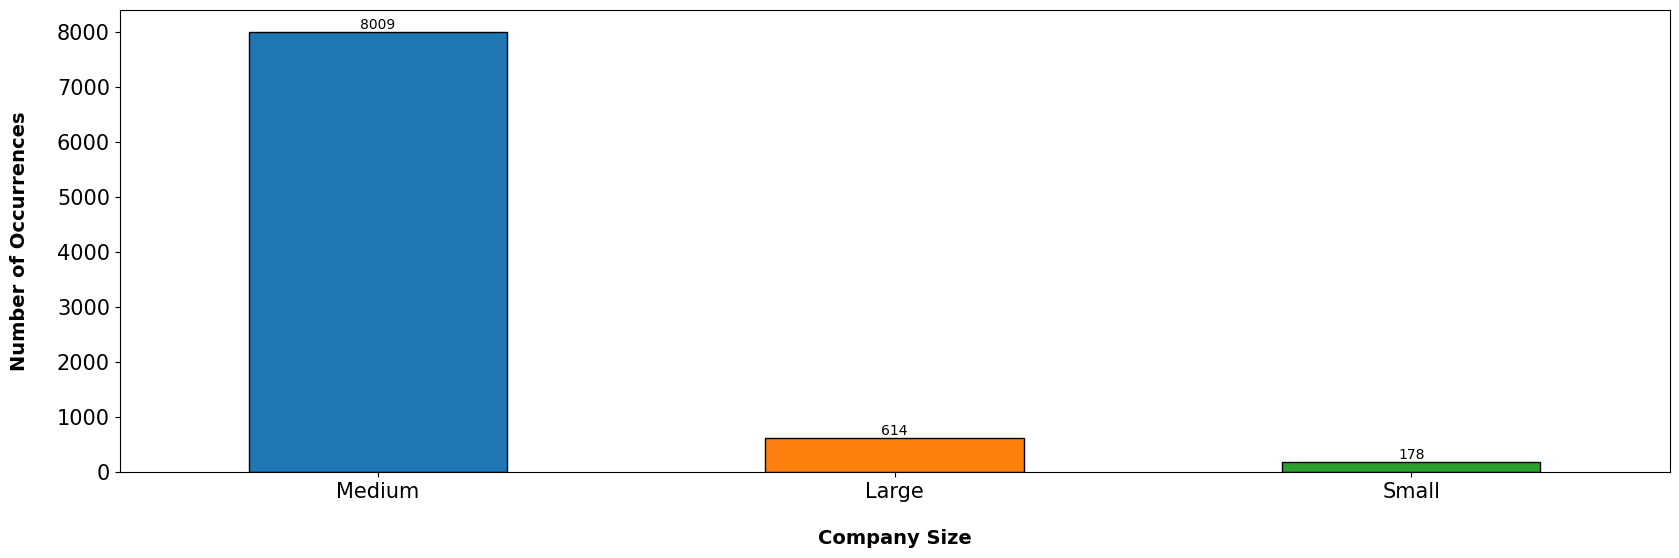

In [20]:
plt.figure(figsize = (20, 6))
ax = df["company_size"].value_counts().plot(kind = 'bar', color = sns.color_palette(), edgecolor='black', rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Company Size', weight = "bold", color="black", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color="black", fontsize = 14, labelpad = 20);

- 2.5: when data got taken?

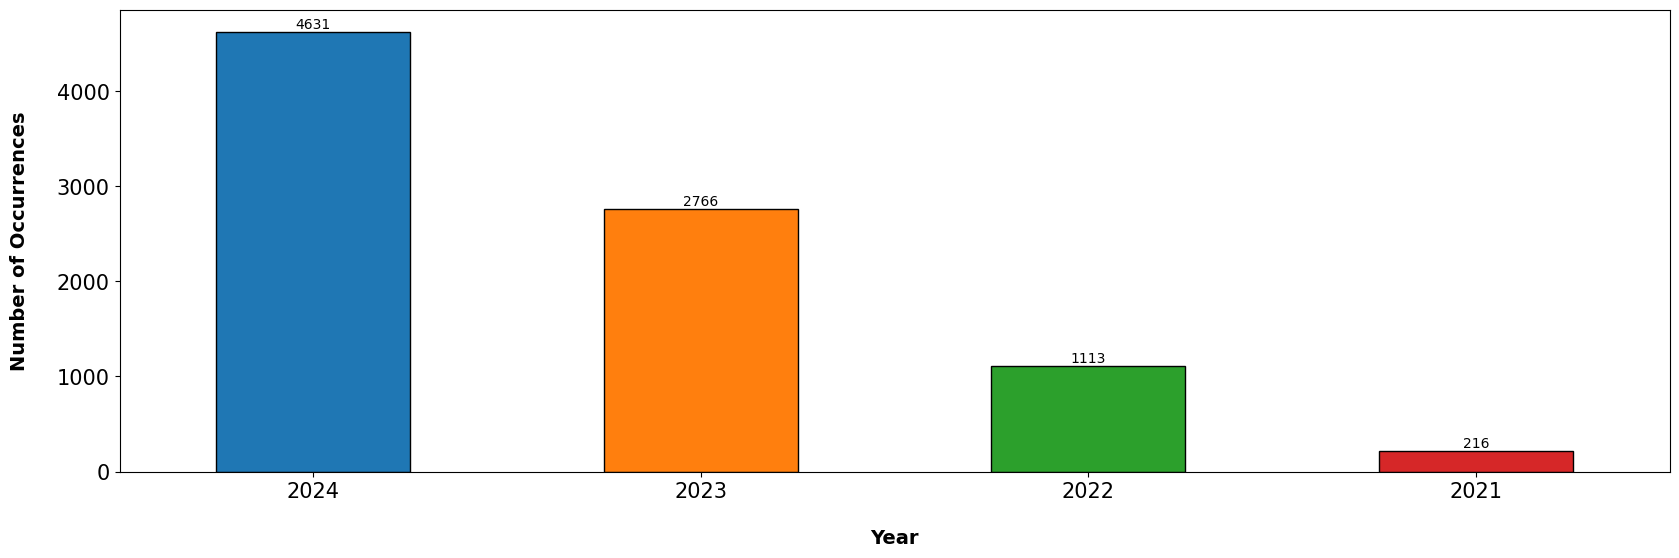

In [21]:
# Filter out work years from 2024 to 2021
filtered_df = df[df['work_year'].isin([2024, 2023, 2022, 2021])]

plt.figure(figsize=(20, 6))
ax = filtered_df["work_year"].value_counts().plot(kind='bar', color=sns.color_palette(), edgecolor='black', rot=0)
ax.set_xticklabels(('2024', '2023', '2022', '2021'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')

ax.tick_params(axis='both', labelsize=15) 

plt.xlabel('Year', weight="bold", color="black", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="black", fontsize=14, labelpad=20)

plt.show()

- 2.6: Top 10 countries with the highest/lowest median salary?

In [22]:
top_10_countries_highest_median_salary = df.groupby('employee_residence')['salary_in_usd'].median().nlargest(10)
print("Top 10 countries with the highest median salary:")
top_10_countries_highest_median_salary = top_10_countries_highest_median_salary.sort_values(ascending = True)
top_10_countries_highest_median_salary

Top 10 countries with the highest median salary:


employee_residence
CH   112,549.50
CN   125,404.00
NZ   130,710.00
CA   137,400.00
US   148,000.00
SA   150,000.00
PR   160,000.00
MY   200,000.00
QA   300,000.00
IL   417,937.00
Name: salary_in_usd, dtype: float64

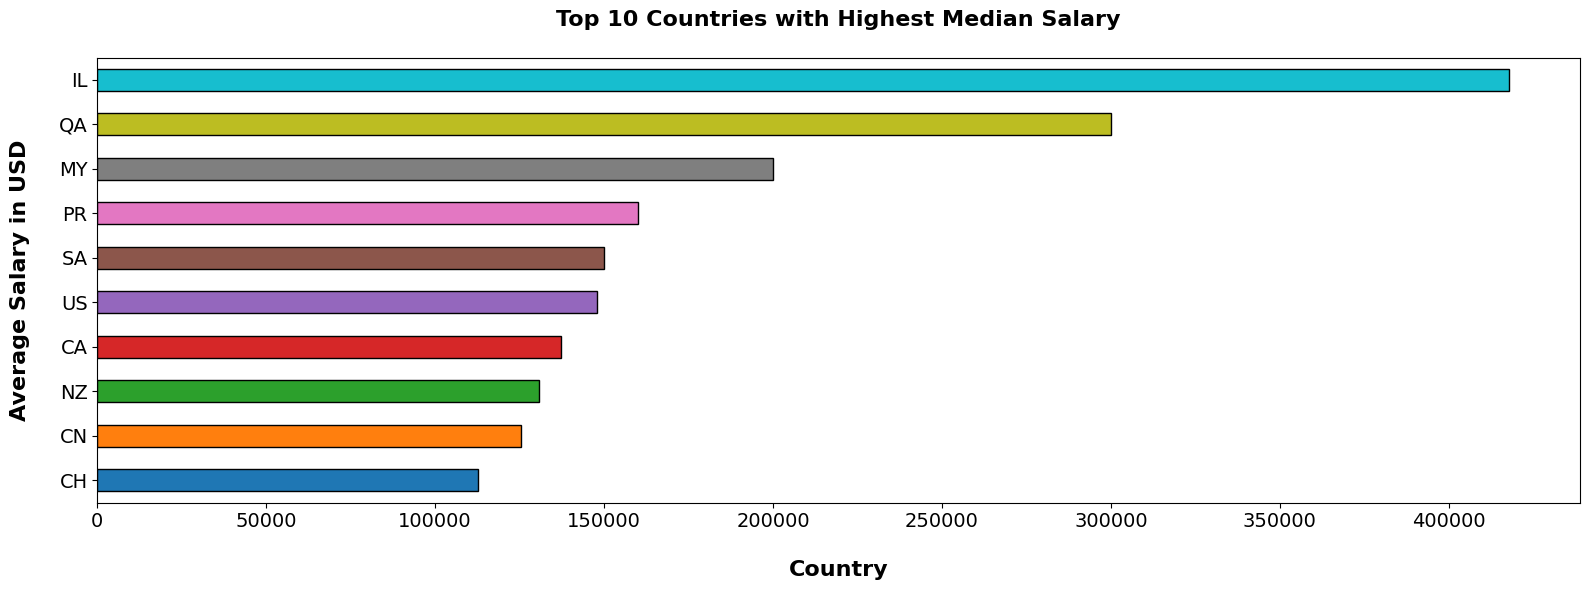

In [23]:
plt.figure(figsize = (16, 6))
top_10_countries_highest_median_salary.plot(kind = 'barh', color = sns.color_palette(), edgecolor = 'black', fontsize = 14)
plt.xlabel('\nCountry', fontsize = 16, weight = 'bold')
plt.ylabel('Average Salary in USD\n', fontsize = 16, weight = 'bold')
plt.title('Top 10 Countries with Highest Median Salary\n', fontsize = 16, weight = 'bold')
plt.xticks(rotation = 0, ha = 'center', fontsize = 14)
plt.tight_layout()
plt.show()

In [24]:
top_10_countries_lowest_median_salary = df.groupby('employee_residence')['salary_in_usd'].median().nsmallest(10)
print("Top 10 countries with the least median salary:")
top_10_countries_lowest_median_salary = top_10_countries_lowest_median_salary.sort_values(ascending = False)
top_10_countries_lowest_median_salary

Top 10 countries with the least median salary:


employee_residence
GH   33,000.00
DK   28,609.00
PE   27,000.00
TH   26,957.00
TR   26,000.00
RS   25,532.00
CR   20,000.00
HN   20,000.00
EC   16,000.00
ID   15,000.00
Name: salary_in_usd, dtype: float64

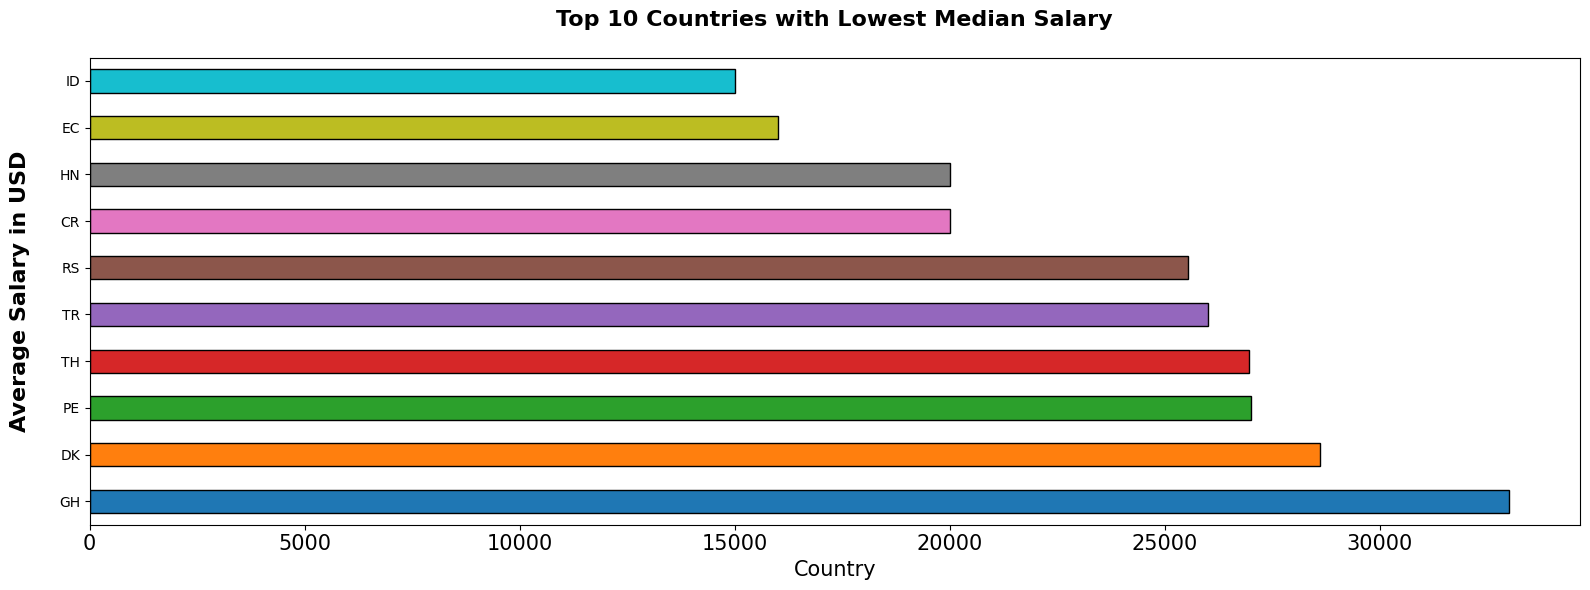

In [25]:
plt.figure(figsize = (16, 6))
top_10_countries_lowest_median_salary.plot(kind = 'barh', color = sns.color_palette(), edgecolor = 'black')
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Average Salary in USD\n', fontsize = 16, weight = 'bold')
plt.title('Top 10 Countries with Lowest Median Salary\n', fontsize = 16, weight = 'bold')
plt.xticks(rotation = 0, ha = 'center', fontsize = 15)
plt.tight_layout()
plt.show()

- 2.7: Median salary based on Company size?

In [26]:
median_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].median()
print("Median salary for each company size:")
print(median_salary_by_company_size)

Median salary for each company size:
company_size
L   106,000.00
M   140,800.00
S    73,000.00
Name: salary_in_usd, dtype: float64


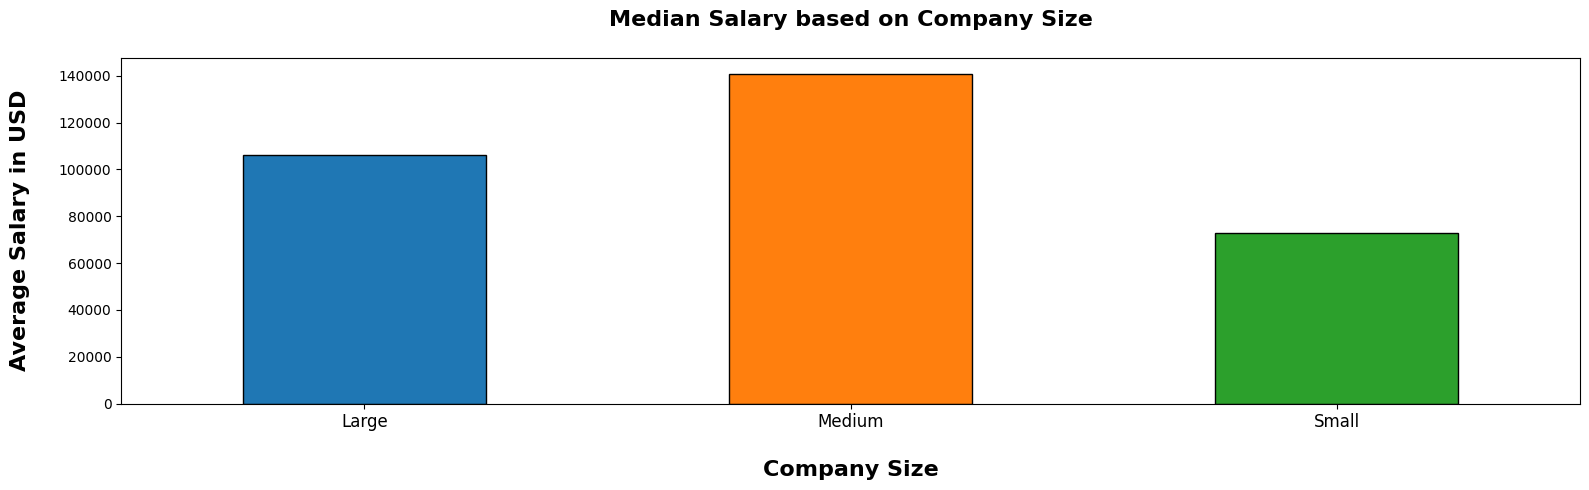

In [27]:
# Define custom labels for x-axis ticks
custom_labels = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}

# Plot the bar chart
plt.figure(figsize=(16, 5))
median_salary_by_company_size.plot(kind='bar', color=sns.color_palette(), edgecolor='black')

# Set x-axis labels and ticks
plt.xlabel('\nCompany Size', fontsize=16, weight='bold')
plt.ylabel('Average Salary in USD\n', fontsize=16, weight='bold')
plt.title('Median Salary based on Company Size\n', fontsize=16, weight='bold')
plt.xticks(rotation=0, ha='center', fontsize=16)

# Set custom x-axis tick labels
plt.xticks(ticks=range(len(custom_labels)), labels=[custom_labels[label] for label in median_salary_by_company_size.index], fontsize=12)

plt.tight_layout()
plt.show()

- 2.8: Salary by employment type?

In [28]:
# Check unique values in the 'employment_type' column
unique_employment_types = df['employment_type'].unique()
print("Unique Employment Types:", unique_employment_types)

Unique Employment Types: ['FL' 'FT' 'PT' 'CT']


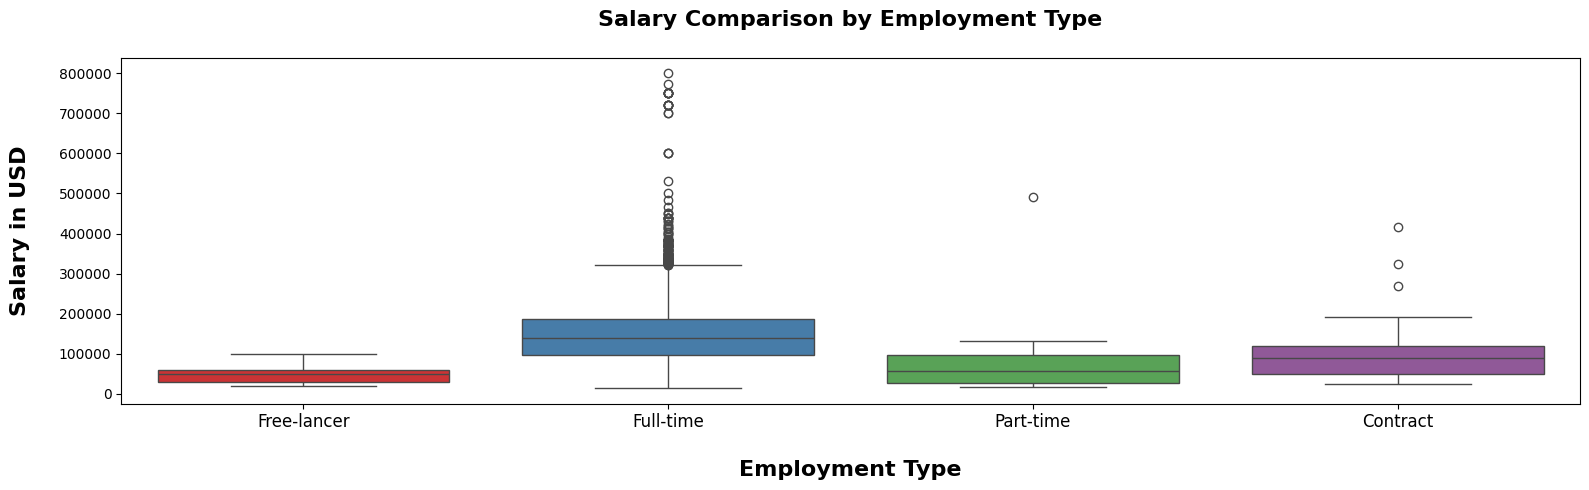

In [29]:
# Define custom labels for x-axis ticks based on the unique values
custom_labels = {'FL': 'Free-lancer', 'PT': 'Part-time', 'FT': 'Full-time', 'CT': 'Contract'}

# Plot boxplot with different colors for each employment type
plt.figure(figsize=(16, 5))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, palette='Set1')
plt.xlabel('\nEmployment Type', fontsize=16, weight='bold')
plt.ylabel('Salary in USD\n', fontsize=16, weight='bold')
plt.title('Salary Comparison by Employment Type\n', fontsize=16, weight='bold')

# Set custom x-axis tick labels
plt.xticks(ticks=range(len(custom_labels)), labels=[custom_labels[label] for label in unique_employment_types], fontsize=12)

plt.tight_layout()
plt.show()

- 2.9: How many employees work in Canada?

In [30]:
# the number is:
canadian_employees = df[df['employee_residence'] == 'CA']
num_canadian_employees = len(canadian_employees)
print(f'Number of employees in Canada: {num_canadian_employees}')

Number of employees in Canada: 335


<Axes: xlabel='job_title'>

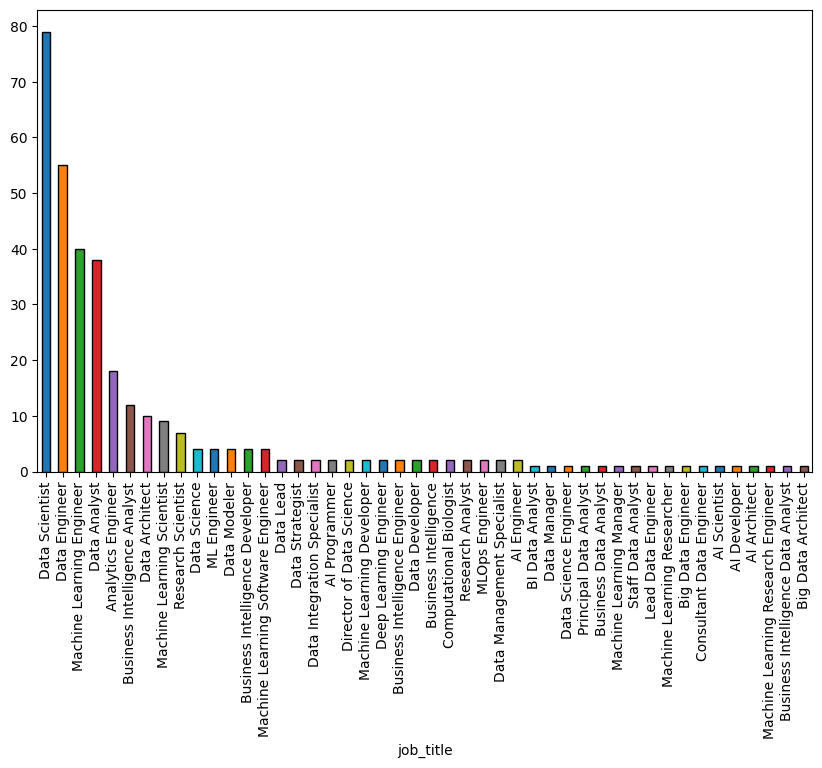

In [31]:
# Plot distribution of job titles for Canada
plt.figure(figsize=(10, 6))
canadian_employees['job_title'].value_counts().plot(kind='bar', color = sns.color_palette(), edgecolor='black')

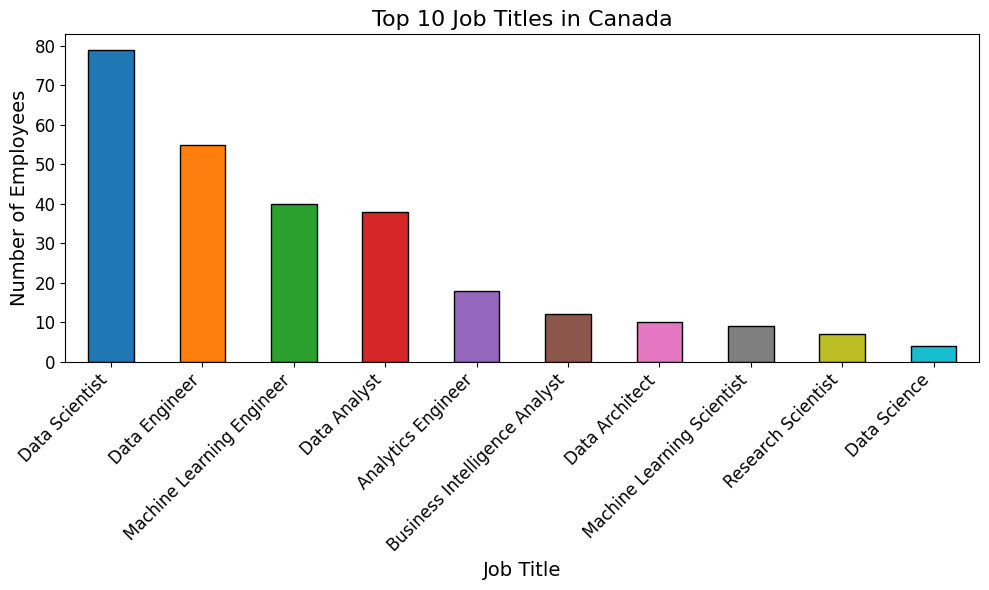

In [32]:
# Filter data for Canada
df_canada = df[df['employee_residence'] == 'CA']

# Count occurrences of each job title
job_title_counts = df_canada['job_title'].value_counts()

# Select top 10 job titles
top_10_job_titles = job_title_counts.head(10)

# Plot distribution of top 10 job titles for Canada
plt.figure(figsize=(10, 6))
top_10_job_titles.plot(kind='bar', color=sns.color_palette(), edgecolor='black')
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.title('Top 10 Job Titles in Canada', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

- 2.10: Average salary for them based on job title?

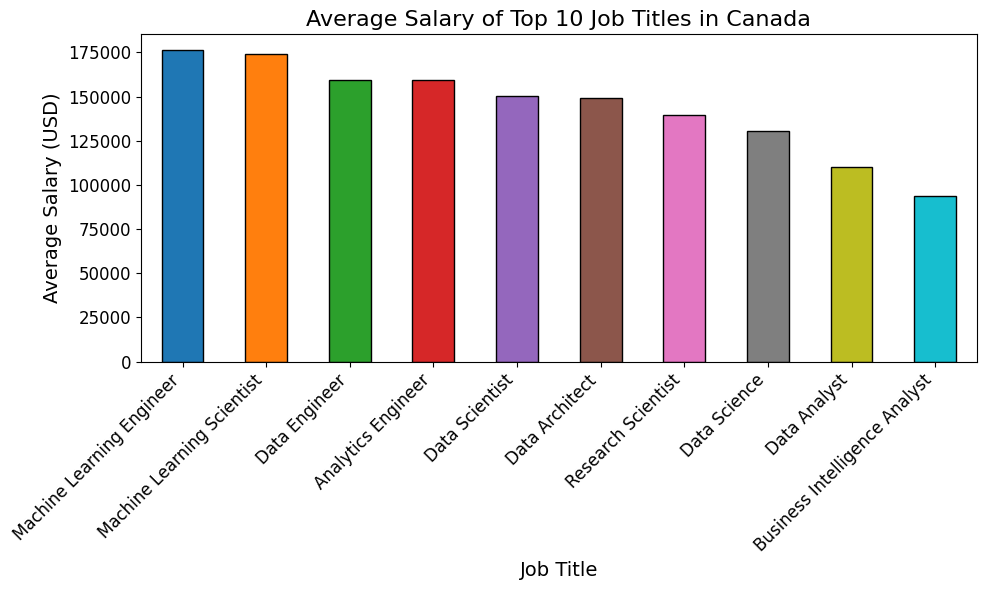

In [33]:
# Filter data for Canada
df_canada = df[df['employee_residence'] == 'CA']

# Count occurrences of each job title
job_title_counts = df_canada['job_title'].value_counts()

# Select top 10 job titles
top_10_job_titles = job_title_counts.head(10)

# Calculate average salary for each job title
average_salary_by_job_title = df_canada.groupby('job_title')['salary'].mean().loc[top_10_job_titles.index]

# Sort the top 10 job titles and average salaries in descending order
average_salary_by_job_title = average_salary_by_job_title.sort_values(ascending=False)

# Plot distribution of top 10 job titles with average salary in Canada
plt.figure(figsize=(10, 6))
average_salary_by_job_title.plot(kind='bar', color=sns.color_palette(), edgecolor='black')
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Average Salary (USD)', fontsize=14)
plt.title('Average Salary of Top 10 Job Titles in Canada', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

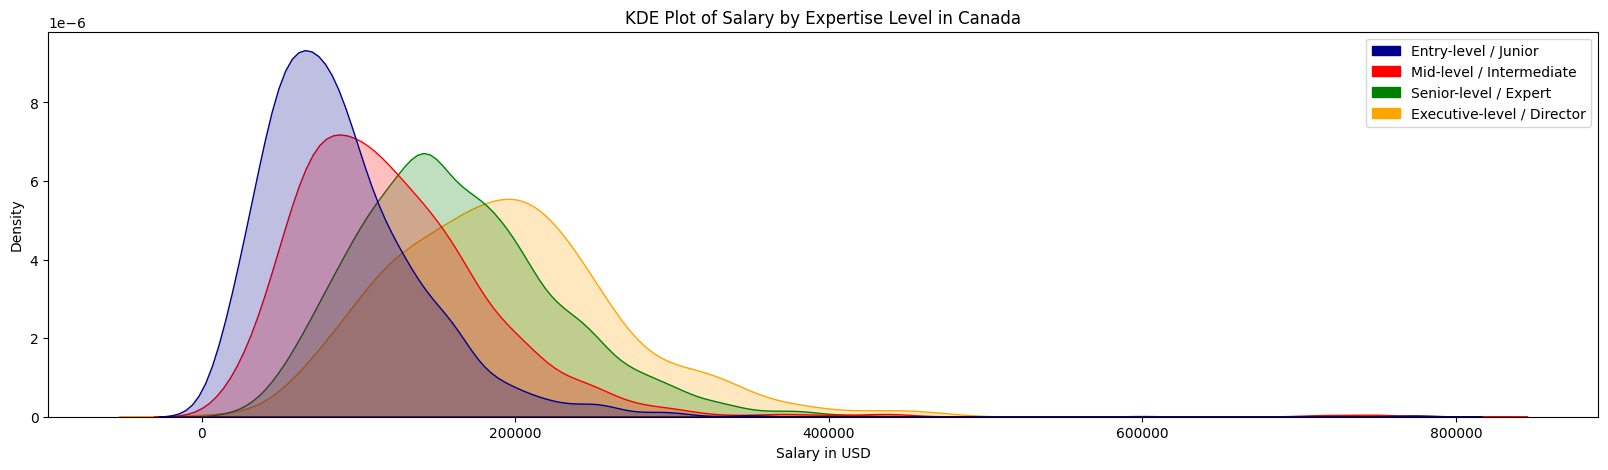

In [34]:
# Define custom hue labels and their corresponding colors
custom_hue_labels = {"EN": 'Entry-level / Junior', "MI": 'Mid-level / Intermediate', "SE": 'Senior-level / Expert',  "EX": 'Executive-level / Director',}
custom_colors = {"EN": 'darkblue', "MI": 'red', "SE": 'green', "EX": 'orange'}

# Map the custom colors to the hue order
hue_order = list(custom_hue_labels.keys())
palette = [custom_colors[hue] for hue in hue_order]

# KDE plot for Salary distribution by Expertise Level in Canada
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df, x='salary_in_usd', hue='experience_level', common_norm=False, fill=True, palette=palette, hue_order=hue_order)
plt.title('KDE Plot of Salary by Expertise Level in Canada')
plt.xlabel('Salary in USD')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values())

plt.show()

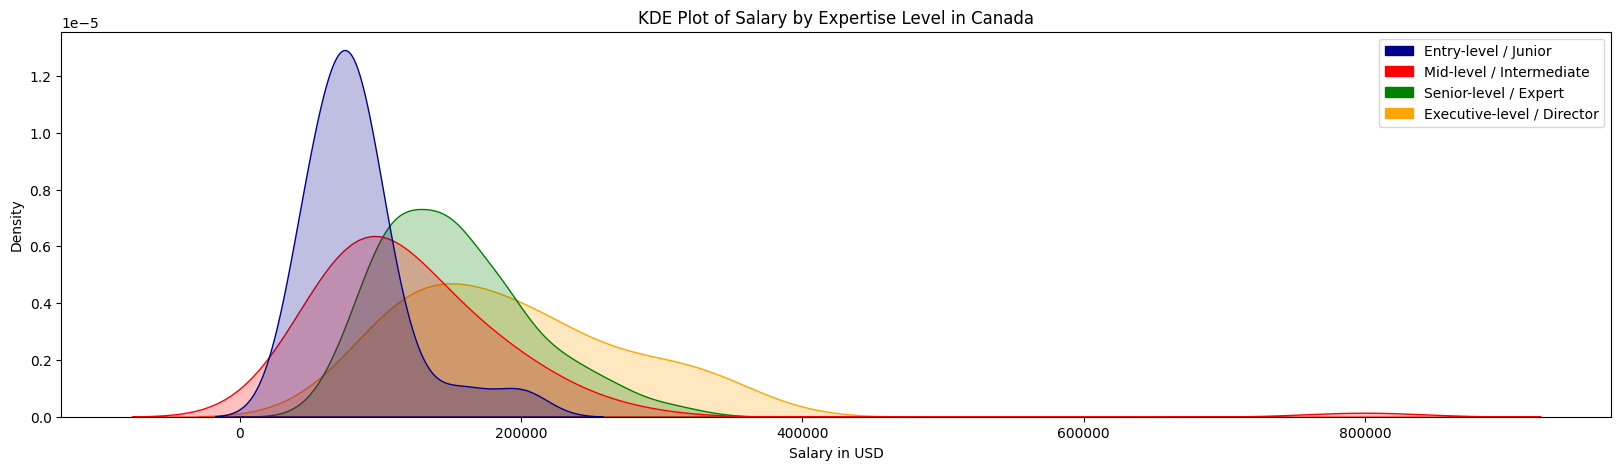

In [35]:
# Filter data for Canada
df_canada = df[df['employee_residence'] == 'CA']

# Define custom hue labels and their corresponding colors
custom_hue_labels = {"EN": 'Entry-level / Junior', "MI": 'Mid-level / Intermediate', "SE": 'Senior-level / Expert',  "EX": 'Executive-level / Director',}
custom_colors = {"EN": 'darkblue', "MI": 'red', "SE": 'green', "EX": 'orange'}

# Map the custom colors to the hue order
hue_order = list(custom_hue_labels.keys())
palette = [custom_colors[hue] for hue in hue_order]

# KDE plot for Salary distribution by Expertise Level in Canada
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df_canada, x='salary_in_usd', hue='experience_level', common_norm=False, fill=True, palette=palette, hue_order=hue_order)
plt.title('KDE Plot of Salary by Expertise Level in Canada')
plt.xlabel('Salary in USD')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values())

plt.show()

In [36]:
#Question. What is the median salary for Entry-level positions?
median_junior_salary = df[df['experience_level'] == 'EN']['salary_in_usd'].median()
print(f'Median salary for Junior-level positions: {median_junior_salary}')

Median salary for Junior-level positions: 80000.0


In [37]:
#Question. What is the average salary for Senior-level positions?
average_senior_salary = df[df['experience_level'] == 'SE']['salary_in_usd'].mean()
print(f'Average salary for Senior-level positions: {average_senior_salary:.2f} USD')

Average salary for Senior-level positions: 163341.87 USD


In [38]:
#Question. What is the most common salary currency in the dataset?
common_currency = df['salary_currency'].mode()[0]
print(f'Most common salary currency: {common_currency}')

Most common salary currency: USD


In [39]:
#Question. How many employees work in Large companies?
large_companies = df[df['company_size'] == 'L']
num_large_company_employees = len(large_companies)
print(f'Number of employees in Large companies: {num_large_company_employees}')

Number of employees in Large companies: 614


In [40]:
#Question. What is the lowest salary in the dataset and which job title corresponds to it?
lowest_salary = df['salary_in_usd'].min()
highest_salary = df['salary_in_usd'].max()
job_title_lowest_salary = df[df['salary_in_usd'] == lowest_salary]['job_title'].values[0]
job_title_highest_salary = df[df['salary_in_usd'] == highest_salary]['job_title'].values[0]
print(f'Lowest salary: {lowest_salary} USD (Job Title: {job_title_lowest_salary})')
print(f'Highest salary: {highest_salary} USD (Job Title: {job_title_highest_salary})')

Lowest salary: 15000 USD (Job Title: Business Intelligence Developer)
Highest salary: 800000 USD (Job Title: AI Architect)


- 2.11: salary trend by year?

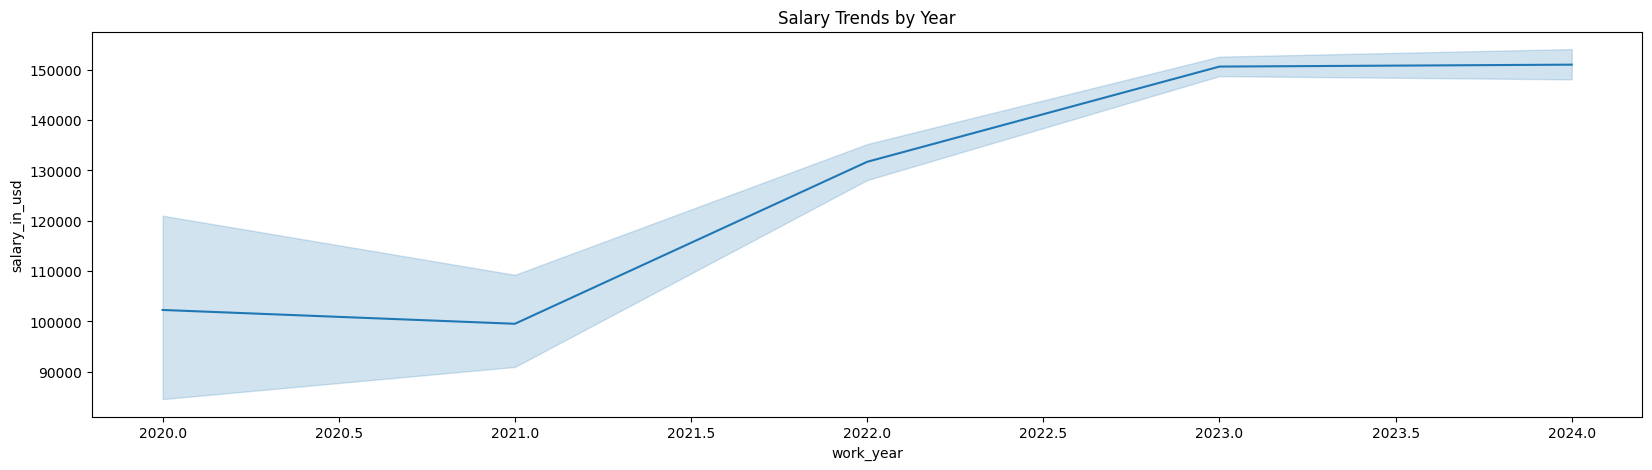

In [41]:
# Line plot for Salary by Year
plt.figure(figsize = (20, 5))
sns.lineplot(x='work_year', y='salary_in_usd', data = df)
plt.title('Salary Trends by Year')
plt.show()

- 2.12: distribution of their salaries?

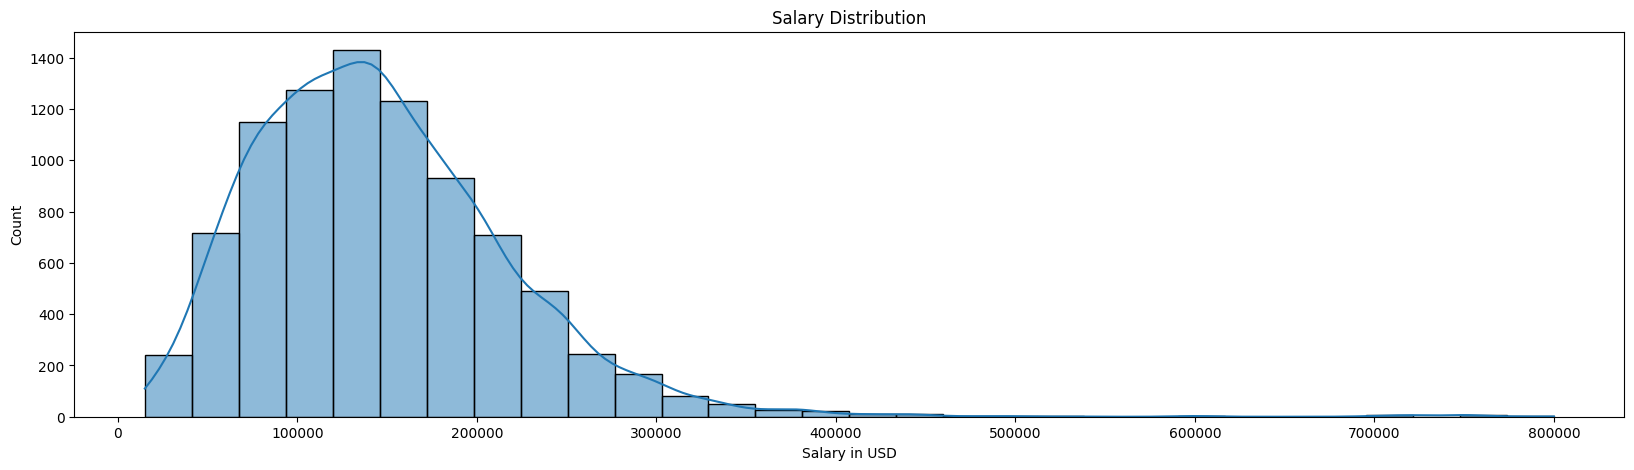

In [42]:
# Histogram for Salary distribution
plt.figure(figsize = (20, 5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.show()

- 2.13: more plot to consider the salary insight:

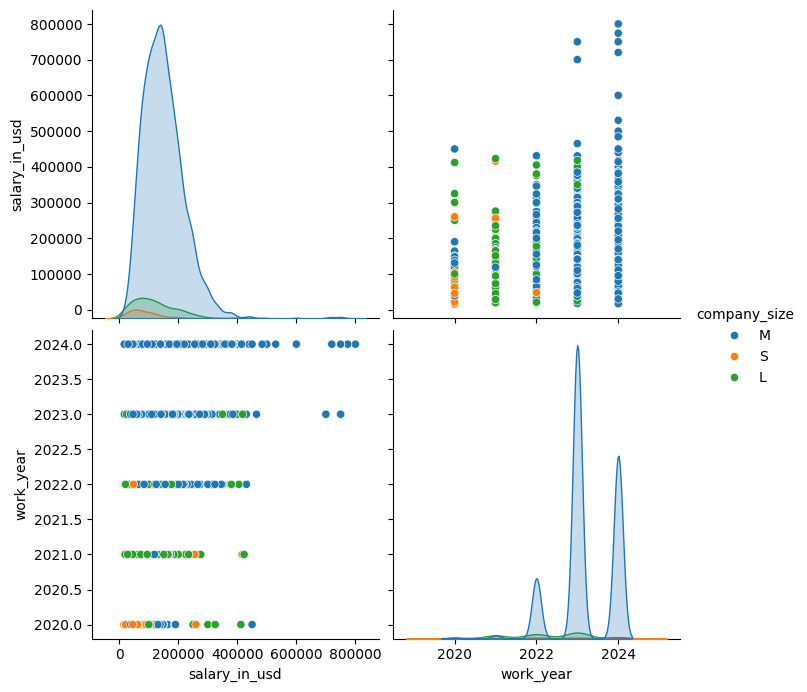

In [43]:
# Pair plot for numerical columns
sns.pairplot(df[['salary_in_usd', 'work_year', 'company_size']], hue='company_size', size = 3.5)
plt.show();

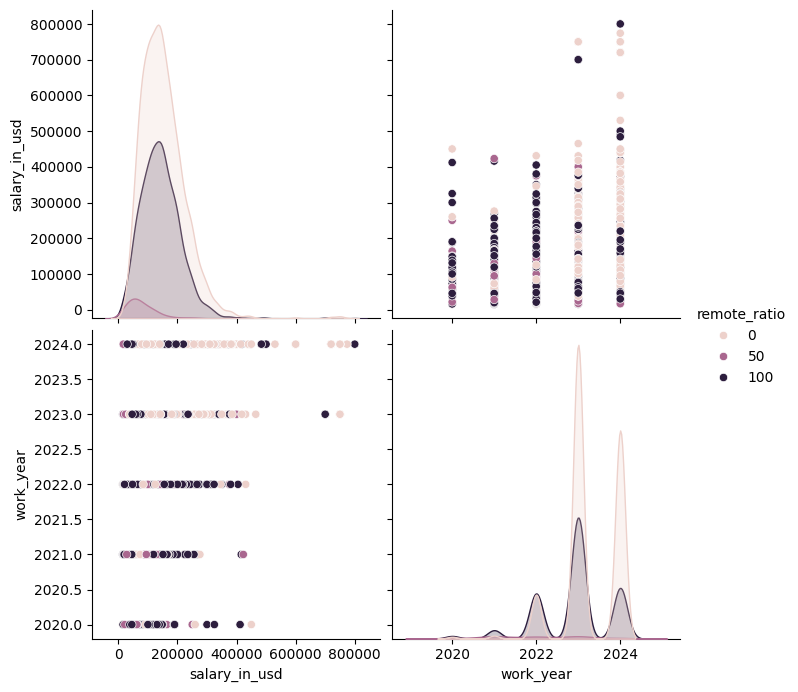

In [44]:
# Pair plot for numerical columns
sns.pairplot(df[['salary_in_usd', 'work_year', 'remote_ratio']], hue='remote_ratio', size = 3.5)
plt.show();

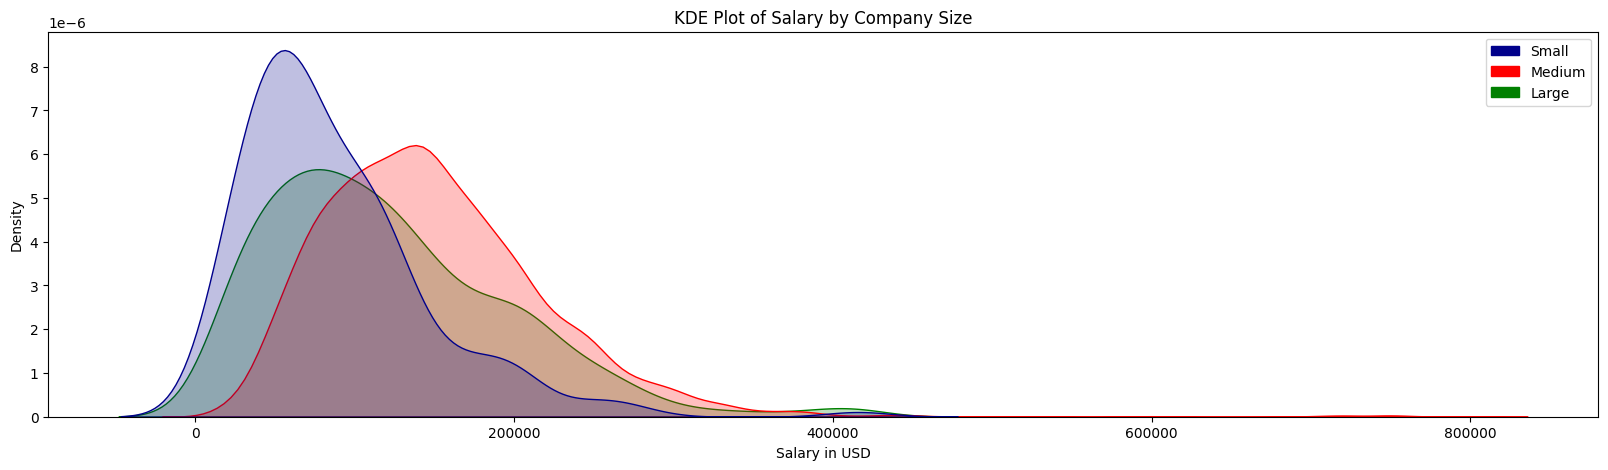

In [45]:
# Define custom hue labels
custom_hue_labels = {'S': 'Small','M': 'Medium','L': 'Large'}
custom_colors = { "S": 'darkblue', "M": 'red', "L": 'green'}

# Map the custom colors to the hue order
hue_order = list(custom_hue_labels.keys())
palette = [custom_colors[hue] for hue in hue_order]

# KDE plot for Salary distribution by Company Size
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df, x='salary_in_usd', hue='company_size', common_norm=False, fill=True, palette=palette, hue_order=hue_order)
plt.title('KDE Plot of Salary by Company Size')
plt.xlabel('Salary in USD')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values())

plt.show()

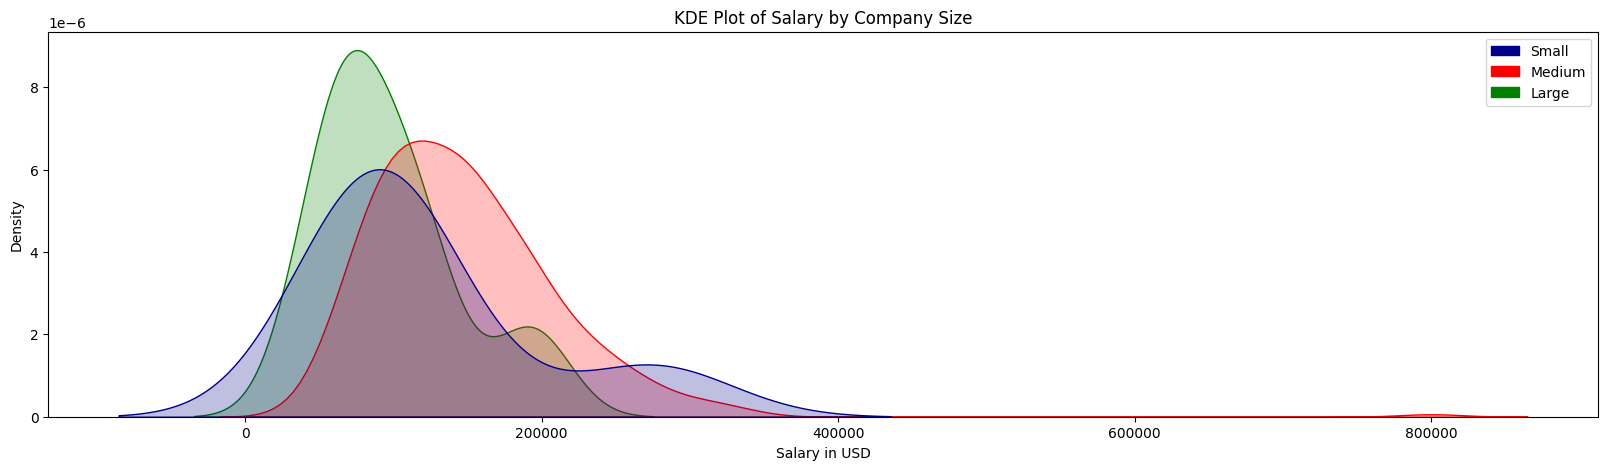

In [46]:
# Filter data for Canada
df_canada = df[df['employee_residence'] == 'CA']

# Define custom hue labels
custom_hue_labels = {'S': 'Small','M': 'Medium','L': 'Large'}
custom_colors = { "S": 'darkblue', "M": 'red', "L": 'green'}

# Map the custom colors to the hue order
hue_order = list(custom_hue_labels.keys())
palette = [custom_colors[hue] for hue in hue_order]

# KDE plot for Salary distribution by Company Size in Canada
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df_canada, x='salary_in_usd', hue='company_size', common_norm=False, fill=True, palette=palette, hue_order=hue_order)
plt.title('KDE Plot of Salary by Company Size')
plt.xlabel('Salary in USD')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values())

plt.show()

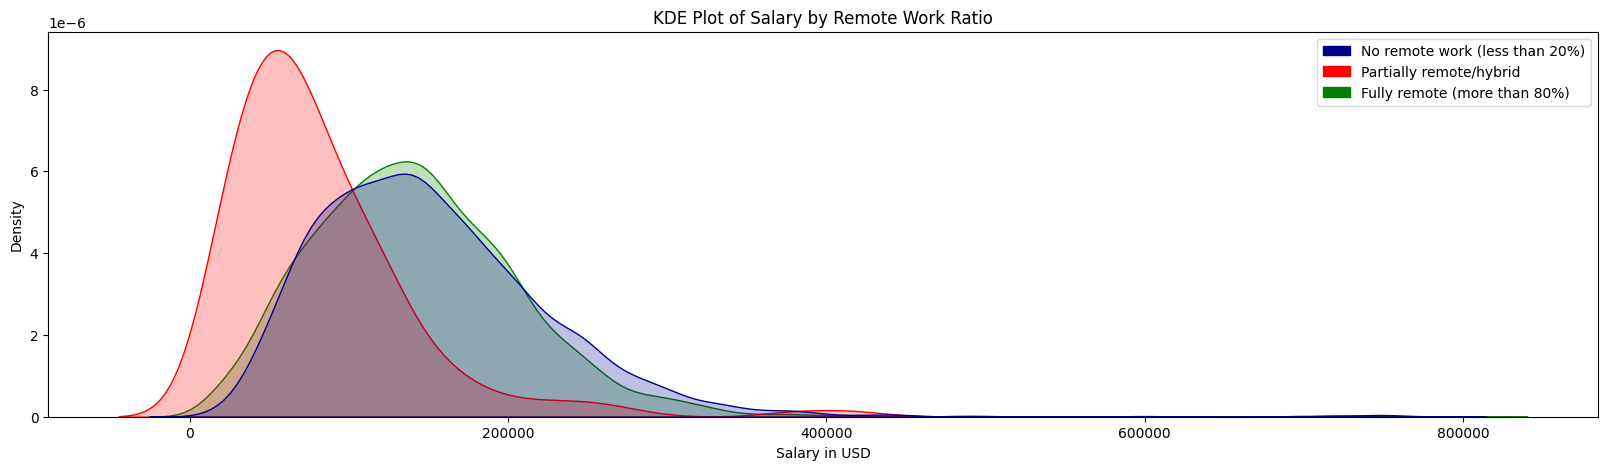

In [47]:
# Correctly define custom hue labels for remote work categories
custom_hue_labels = {
    '0': 'No remote work (less than 20%)',
    '50': 'Partially remote/hybrid',
    '100': 'Fully remote (more than 80%)'
}
custom_colors = {
    '0': 'darkblue', 
    '50': 'red', 
    '100': 'green'
}

# Since 'remote_ratio' might be stored as integer, ensure keys are strings for matching
df['remote_ratio'] = df['remote_ratio'].astype(str)

# Map the custom colors to the hue order
hue_order = list(custom_hue_labels.keys())
palette = [custom_colors[hue] for hue in hue_order]

# KDE plot for Salary distribution by Remote Ratio
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df, x='salary_in_usd', hue='remote_ratio', common_norm=False, fill=True, palette=palette, hue_order=hue_order)
plt.title('KDE Plot of Salary by Remote Work Ratio')
plt.xlabel('Salary in USD')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values())

plt.show()


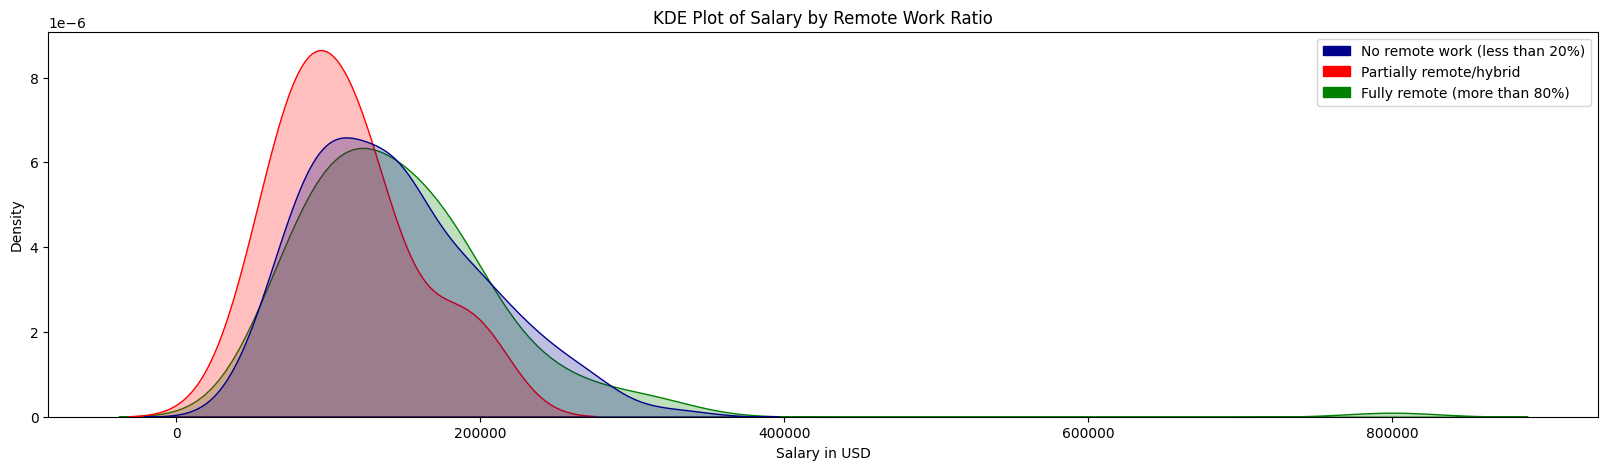

In [48]:
# Filter data for Canada
df_canada = df[df['employee_residence'] == 'CA']

# Correctly define custom hue labels for remote work categories
custom_hue_labels = {
    '0': 'No remote work (less than 20%)',
    '50': 'Partially remote/hybrid',
    '100': 'Fully remote (more than 80%)'
}
custom_colors = {
    '0': 'darkblue', 
    '50': 'red', 
    '100': 'green'
}

# Since 'remote_ratio' might be stored as integer, ensure keys are strings for matching
df['remote_ratio'] = df['remote_ratio'].astype(str)

# Map the custom colors to the hue order
hue_order = list(custom_hue_labels.keys())
palette = [custom_colors[hue] for hue in hue_order]

# KDE plot for Salary distribution by Remote Ratio in Canada
plt.figure(figsize=(20, 5))
sns.kdeplot(data=df_canada, x='salary_in_usd', hue='remote_ratio', common_norm=False, fill=True, palette=palette, hue_order=hue_order)
plt.title('KDE Plot of Salary by Remote Work Ratio')
plt.xlabel('Salary in USD')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values())

plt.show()


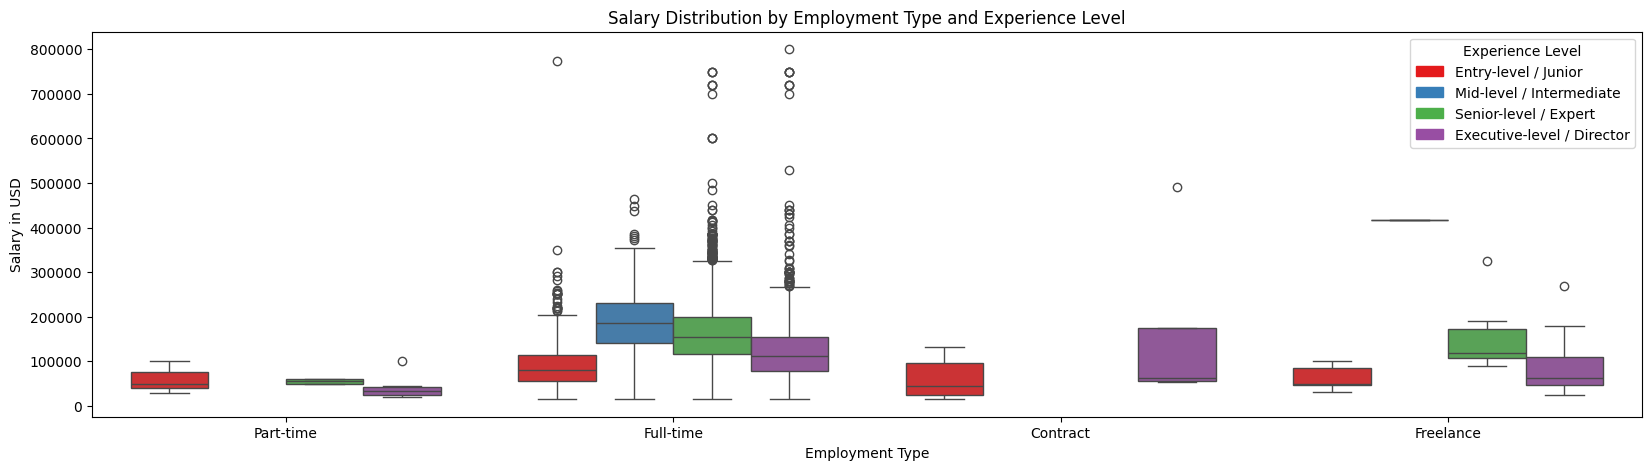

In [49]:
# Define custom hue labels and x-axis tick labels
custom_hue_labels = {'EN': 'Entry-level / Junior', 'MI': 'Mid-level / Intermediate', 'SE': 'Senior-level / Expert', 'EX': 'Executive-level / Director'}
custom_x_labels = {'PT': 'Part-time', 'FT': 'Full-time', 'CT': 'Contract', 'FL': 'Freelance'}

# Boxplot for Salary Distribution by Employment Type and Experience Level
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', hue='experience_level', palette='Set1')

# Set title and labels
plt.title('Salary Distribution by Employment Type and Experience Level')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')

# Set custom x-axis tick labels
plt.xticks(ticks=range(len(custom_x_labels)), labels=custom_x_labels.values())

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette('Set1', n_colors=len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values(), title='Experience Level')

plt.show()

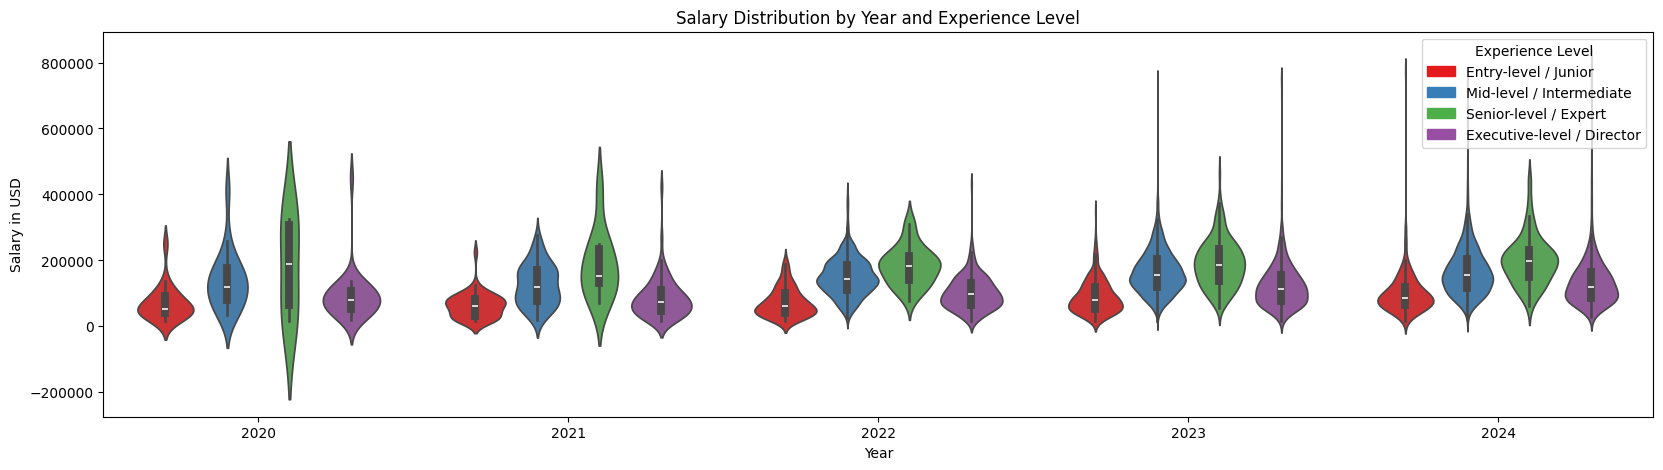

In [50]:
# Define custom hue labels
custom_hue_labels = {'EN': 'Entry-level / Junior', 'MI': 'Mid-level / Intermediate', 'SE': 'Senior-level / Expert', 'EX': 'Executive-level / Director'}

# Violin plot for Salary Distribution by Year and Experience Level
plt.figure(figsize=(20, 5))
sns.violinplot(data=df, x='work_year', y='salary_in_usd', hue='experience_level', palette='Set1')

# Set title and labels
plt.title('Salary Distribution by Year and Experience Level')
plt.xlabel('Year')
plt.ylabel('Salary in USD')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette('Set1', n_colors=len(custom_hue_labels))]
plt.legend(handles, custom_hue_labels.values(), title='Experience Level')

plt.show()

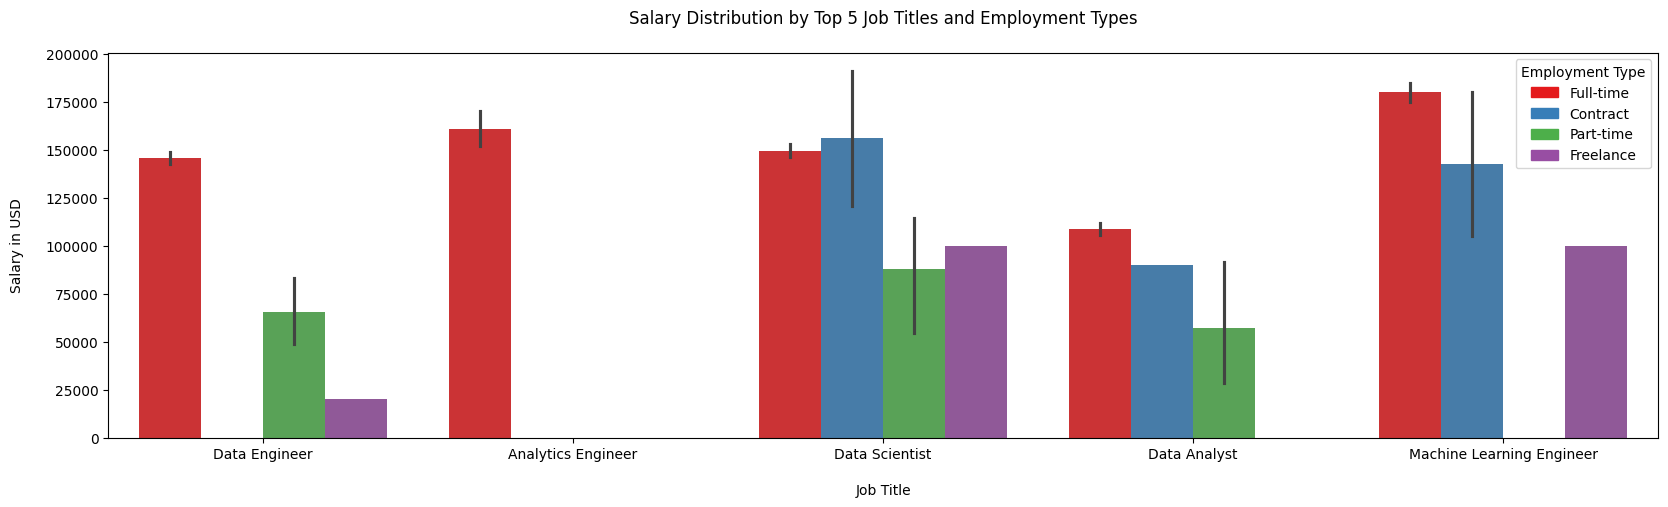

In [51]:
# Define custom hue labels
custom_hue_labels = {'FT': 'Full-time', 'CT': 'Contract', 'PT': 'Part-time', 'FL': 'Freelance'}

# Custom palette for the plot
custom_palette = sns.color_palette('Set1', n_colors=len(custom_hue_labels))

# Select top 5 job titles and employment types
top_job_titles = df['job_title'].value_counts().head(5).index
top_employment_types = df['employment_type'].value_counts().head(5).index

filtered_df = df[(df['job_title'].isin(top_job_titles)) & (df['employment_type'].isin(top_employment_types))]

# Bar plot for Salary Distribution by Top 5 Job Titles and Employment Types
plt.figure(figsize=(20, 5))
sns.barplot(data=filtered_df, x='job_title', y='salary_in_usd', hue='employment_type', palette=custom_palette)

# Set title and labels
plt.xlabel('\nJob Title')
plt.ylabel('Salary in USD\n')
plt.title('Salary Distribution by Top 5 Job Titles and Employment Types\n')

# Set x-axis tick rotation
plt.xticks(rotation=0)

# Create custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_palette]
plt.legend(handles, custom_hue_labels.values(), title='Employment Type')

plt.show()

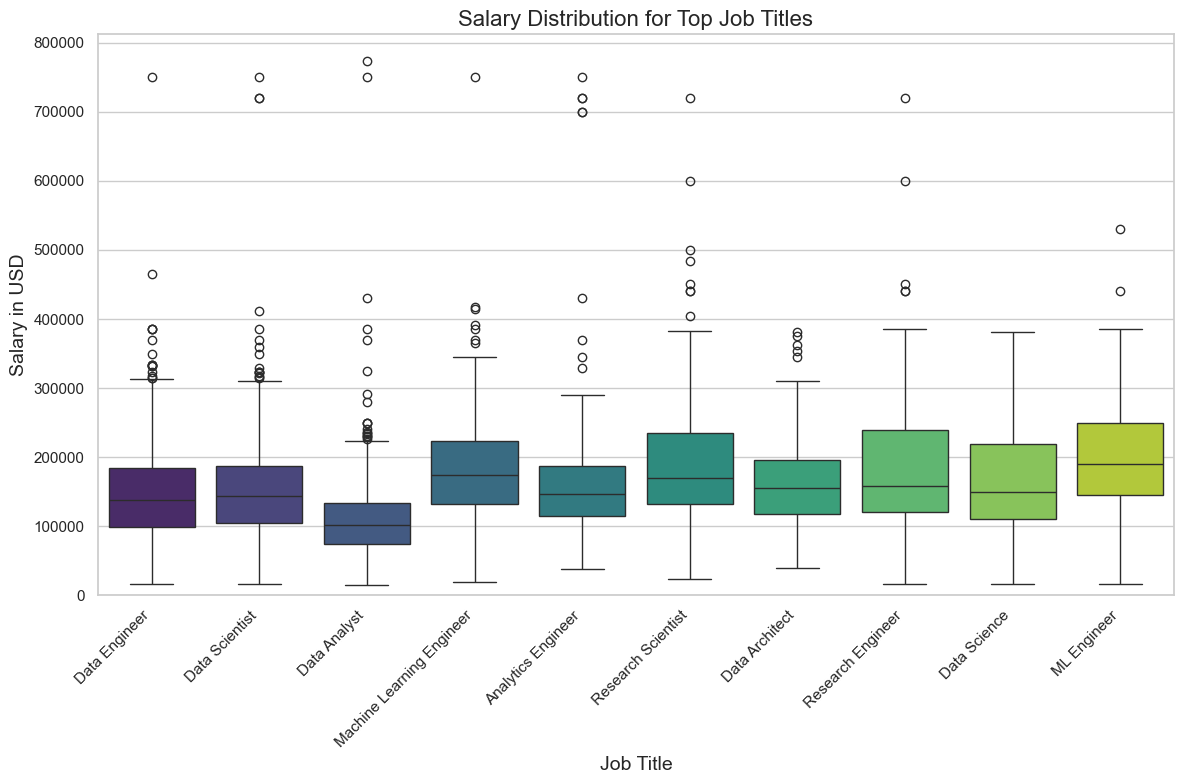

In [52]:
#Top Job Salaries
# Subset the data for the most frequent job titles
top_job_titles = df['job_title'].value_counts().nlargest(10).index
subset_df = df[df['job_title'].isin(top_job_titles)]

# Set the figure size and adjust spacing
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.0)
sns.set_style("whitegrid")

# Create the box plot
sns.boxplot(data=subset_df, x='job_title', y='salary_in_usd', order=top_job_titles, palette='viridis')

# Set plot title and labels
plt.title('Salary Distribution for Top Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust y-axis limits for better visualization of outliers
plt.ylim(bottom=0)

# Add more space between plots
plt.tight_layout()

# Show the plot
plt.show()

### Observation from EDA:
1. There are about 150 job titles in data tech industry with the top of 4 jobs in the dataset are Data Engineering, Data Scientist, Data Analysis, and Machine Learning Engineer.
2. The distribution of salary has the high peak around **$90,000 - $150,000**
3. Most of the position level the companies look for is Senior and most of companies are recruiting is Medium size.
4. The position have 4 options of employments (full time, contract, part-time, freelancer) is Data Science
5. The data set collected for 4 years with the most data in 2024.
6. Top countries with the highest salary such as Isreal, Qatar, Malaysia, Puerto Rico, South Africe, US and **Canada**.
7. The most common jobs in **Canada** are data scientist, data engineering, ML engineer and analytics engineer.
8. The average salaries for these jobs in **Canada** from **$100,000 - $175,000**
9. Large and Medium companies have the average salary is not much different.
10. The salary through 4 years has the increase and more stable after 2023.

### Part 3: Preprocessing

#### Feature engineering 
Encode Categorical Variables: Many ML models require numerical input, so we'll convert categorical variables (experience_level, employment_type, job_title, employee_residence, company_location, company_size) into numerical values using one-hot encoding or label encoding.

Feature Selection: Decide which features are relevant. For simplicity, let's focus on experience_level, employment_type, job_title, company_size, and remote_ratio.

- There are objective data we need to encode and drop the duplicated data

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# Initialize label encoders
le_residence = LabelEncoder()
le_location = LabelEncoder()

# Fit and transform the categories to numbers
df['employee_residence_encoded'] = le_residence.fit_transform(df['employee_residence'])
df['company_location_encoded'] = le_location.fit_transform(df['company_location'])

# Now you can calculate the correlation between the encoded columns
correlation_matrix = df[['employee_residence_encoded', 'company_location_encoded']].corr()

# Display the correlation matrix
print(correlation_matrix)

                            employee_residence_encoded  \
employee_residence_encoded                        1.00   
company_location_encoded                          0.97   

                            company_location_encoded  
employee_residence_encoded                      0.97  
company_location_encoded                        1.00  


As we want to see the data for employee so I will drop company location

In [54]:
# Encode categorical columns using one-hot encoding
encoded_categorical_df = pd.get_dummies(df[['experience_level','job_title', 'employment_type','employee_residence','salary_in_usd','remote_ratio','company_size']], prefix='Cat')


In [55]:
# Drop the original categorical columns from the DataFrame
df.drop(columns=['experience_level', 'job_title', 'employment_type', 'employee_residence', 'salary_in_usd', 'remote_ratio', 'company_size'], inplace=True)

In [56]:
# Concatenate the encoded categorical data with the original numeric data
merged_df = pd.concat([df, encoded_categorical_df], axis=1)



In [57]:
merged_df.head(3)

,work_year,salary,salary_currency,company_location,employee_residence_encoded,company_location_encoded,salary_in_usd,Cat_EN,Cat_EX,Cat_MI,...,Cat_US,Cat_UZ,Cat_VN,Cat_ZA,Cat_0,Cat_100,Cat_50,Cat_L,Cat_M,Cat_S
0,2024,30000,USD,GB,31,27,30000,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,2024,230000,USD,US,84,74,230000,False,True,False,...,True,False,False,False,True,False,False,False,True,False
2,2024,176900,USD,US,84,74,176900,False,True,False,...,True,False,False,False,True,False,False,False,True,False


In [64]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr().abs()

# Create a mask for highly correlated features
highly_correlated = correlation_matrix > 0.8

# Find pairs of highly correlated features
correlated_pairs = (correlation_matrix.where(highly_correlated)
                          .stack()
                          .reset_index()
                          .rename(columns={0: 'correlation', 'level_0': 'feature1', 'level_1': 'feature2'}))

In [65]:

# Drop duplicate pairs and self-correlations
correlated_pairs = correlated_pairs[correlated_pairs['feature1'] != correlated_pairs['feature2']]
correlated_pairs['pairs'] = correlated_pairs.apply(lambda row: sorted([row['feature1'], row['feature2']]), axis=1)
correlated_pairs = correlated_pairs.drop_duplicates(subset='pairs')
correlated_pairs = correlated_pairs.drop(columns=['pairs'])

# Print highly correlated pairs
print("Highly correlated pairs:")
print(correlated_pairs)

# Drop one of the features from each correlated pair
features_to_drop = correlated_pairs['feature1'].tolist() + correlated_pairs['feature2'].tolist()
features_to_drop = list(set(features_to_drop))  # Remove duplicates
print("\nFeatures to drop:", features_to_drop)

# Drop highly correlated features from the DataFrame
merged_df_filtered = merged_df.drop(columns=features_to_drop)



Highly correlated pairs:
Empty DataFrame
Columns: [feature1, feature2, correlation]
Index: []

Features to drop: []


In [60]:
merged_df_filtered.head()

,work_year,salary,salary_currency,company_location,employee_residence_encoded,company_location_encoded,salary_in_usd,Cat_EN,Cat_EX,Cat_MI,...,Cat_US,Cat_UZ,Cat_VN,Cat_ZA,Cat_0,Cat_100,Cat_50,Cat_L,Cat_M,Cat_S
0,2024,30000,USD,GB,31,27,30000,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,2024,230000,USD,US,84,74,230000,False,True,False,...,True,False,False,False,True,False,False,False,True,False
2,2024,176900,USD,US,84,74,176900,False,True,False,...,True,False,False,False,True,False,False,False,True,False
3,2024,171210,USD,CA,12,11,171210,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,2024,92190,USD,CA,12,11,92190,False,False,False,...,False,False,False,False,True,False,False,False,True,False


### Part 4: Modelling

In this section, we will employ three types of modeling techniques:
-  1. 
Linear Regreion
 - 2.
Random Forert Regresessor
- 3.
XGBoost Regresessor



We will utilize these moby plitting tos for training and testing, evaluating their accuracy.

--- to be continued--

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [62]:
# Select relevant features and the target variable
features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency',
            'employee_residence', 'remote_ratio', 'company_location', 'company_size']
target = 'salary_in_usd'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make salary predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

KeyError: "['experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_size'] not in index"

In [ ]:




# 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test data
y_pred = model.predict(X_test)

# 5. Evaluate the model's performance using appropriate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Calculate baseline metrics (e.g., using mean or median)
y_baseline = np.full_like(y_test, np.mean(y_train))  # Assuming baseline is the mean of training target variable
baseline_mse = mean_squared_error(y_test, y_baseline)
baseline_mae = mean_absolute_error(y_test, y_baseline)
baseline_r2 = r2_score(y_test, y_baseline)

print("\nBaseline Mean Squared Error:", baseline_mse)
print("Baseline Mean Absolute Error:", baseline_mae)
print("Baseline R-squared:", baseline_r2)

<div id="container" style="position:relative;">
<div style="position:relative; float:right">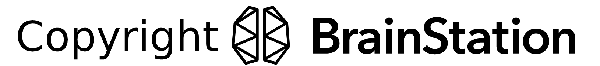
</div>
</div>